In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [3]:
SLC_sum = pd.read_csv('/Users/Emily/Desktop/screens/SLC/SLC_iaSum_tidy.csv', index_col=0)
SLC_sum.head()

,WellNo,area,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID,Passes QC
0,1A,2306203,424,0.069252,Fraction 9,N2 (Bristol),20231113_004,3039,SLC_11,Y
1,1B,2350475,188,-0.158537,Fraction 9,N2 (Bristol),20231113_004,3043,SLC_11,Y
2,1C,2285444,300,0.209302,Fraction 9,N2 (Bristol),20231113_004,3039,SLC_11,Y
3,1D,2339278,282,0.099174,Fraction 9,N2 (Bristol),20231113_004,3041,SLC_11,Y
4,2A,2335409,384,0.025157,Fraction 10,N2 (Bristol),20231113_004,3066,SLC_12,Y


In [34]:
def get_worm_locs_c(row, wrms, result_dict): 

    fname = row['File Name']
    wellnum = row['WellNo']
    loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
    temp = pd.read_csv(loc_fname)
    compound = row['Compound']
    xs = temp['X']
    if compound in result_dict:
        result_dict[compound] = result_dict[compound].append(xs)
        #print(compound + ' ' + str(len(result_dict[compound])))
        result_dict[compound].reset_index(inplace=True, drop=True)
        #print(result_dict.keys())
        
        #result_dict[compound] = result_dict[compound]+xs
    else:
        result_dict[compound]=xs

    return result_dict

In [35]:
fpath = plb.Path('C:/Users/Emily/Desktop/screens/SLC/slc_ia/')


In [42]:
compounds = ['empty_empty', 'MM_MM', 'V8S_V8S', 'V8S_MM', 'V8S_T14', 'V8E_T14', 'Me10_H2O', 'Me98_H2O','Fraction 3', 'Fraction 4', 
'Fraction 5', 'Fraction 6', 'Fraction 7','Fraction 8', 'Fraction 9', 'Fraction 10', 'Fraction 11',
'Fraction 12', 'Fraction 13', 'Fraction 14', 'Fraction 15', 'Fraction 16', 'Fraction 17', 'Fraction 18', 'Fraction 19',
'Fraction 20', 'Fraction 21', 'Fraction 22', 'Fraction 23', 'Fraction 24', 'Fraction 25', 'Fraction 26', 'Fraction 27',  
'Fraction 28', 'Fraction 29', 'Fraction 30', 'Fraction 31', 'Fraction 32', 'Fraction 33', 'Fraction 34'  ]

In [43]:
compound_dct = {'empty_empty': '#808080', 'MM_MM': '#808080', 'V8S_V8S': '#808080', 'V8S_MM': '#808080', 'V8S_T14': '#808080', 'V8E_T14': '#808080', 'Me10_H2O': '#808080', 'Me98_H2O': '#808080','Fraction 3':'#6495ED', 'Fraction 4':'#6495ED', 
'Fraction 5':'#6495ED', 'Fraction 6':'#6495ED', 'Fraction 7':'#6495ED','Fraction 8':'#6495ED', 'Fraction 9':'#6495ED', 'Fraction 10':'#6495ED', 'Fraction 11':'#6495ED',
'Fraction 12':'#6495ED', 'Fraction 13':'#6495ED', 'Fraction 14':'#6495ED', 'Fraction 15':'#6495ED', 'Fraction 16':'#6495ED', 'Fraction 17':'#6495ED', 'Fraction 18':'#6495ED', 'Fraction 19':'#6495ED',
'Fraction 20':'#6495ED', 'Fraction 21':'#6495ED', 'Fraction 22':'#6495ED', 'Fraction 23':'#6495ED', 'Fraction 24':'#6495ED', 'Fraction 25':'#6495ED', 'Fraction 26':'#6495ED', 'Fraction 27':'#6495ED',  
'Fraction 28':'#6495ED', 'Fraction 29':'#6495ED', 'Fraction 30':'#6495ED', 'Fraction 31':'#6495ED', 'Fraction 32':'#6495ED', 'Fraction 33':'#6495ED', 'Fraction 34':'#6495ED'}

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


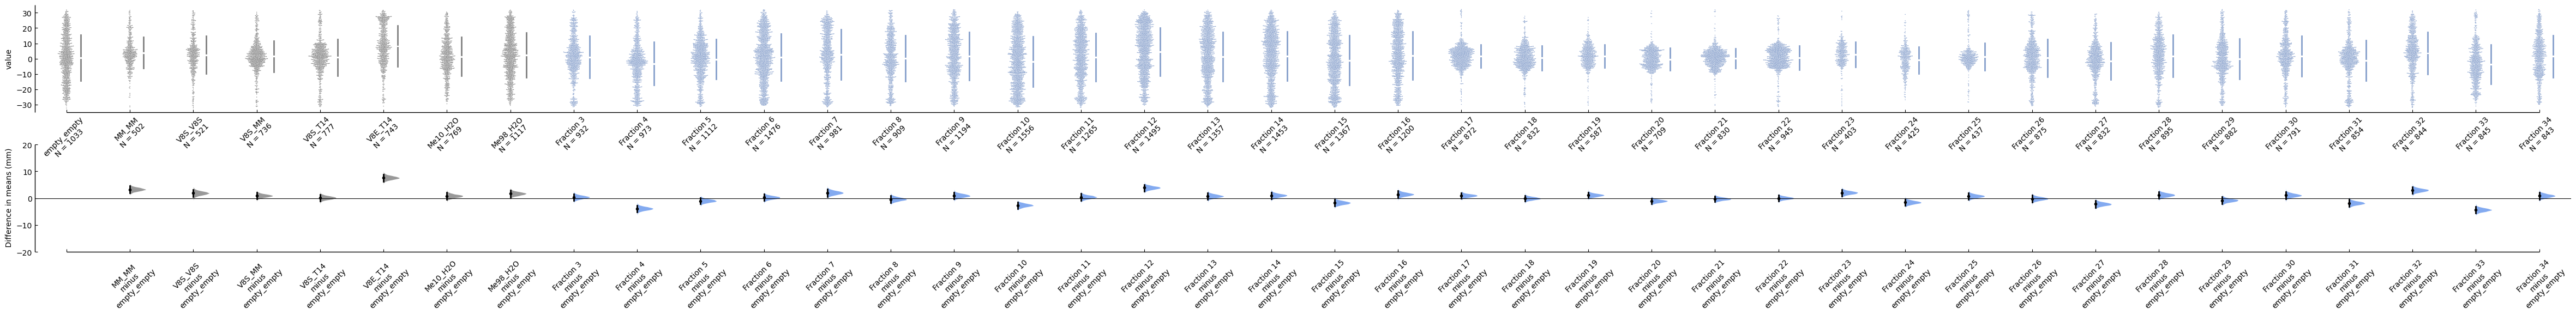

In [46]:
h = {}
for c in compounds:
    data = SLC_sum.loc[SLC_sum['Compound'] == c]
    for index, row in data.iterrows():
        hold = get_worm_locs_c(row, fpath, h)

                
pooled = pd.DataFrame.from_dict(hold)
pooled.to_csv('C:/Users/Emily/Desktop/screens/SLC/SLC_xs.csv')
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm
#The following transforms the worm location data so that it is respective to the start zone
# The start zone is at the center of the image; Start Zone = 0mm
#Worms with positive values are closer to the compound, negative values are away from the compound
mm_df = pooled.apply(lambda x: -(x/px_mm)+32.5)
db_obj = db.load(mm_df, idx=(compounds))
res = db_obj.mean_diff.results



mm_plot = db_obj.mean_diff.plot(raw_marker_size=1,contrast_label=" Difference in means (mm)",
                                custom_palette=compound_dct,contrast_ylim = (-20,20), swarm_ylim=(-35,35), es_marker_size=3)

#Accessing plot axes to control plot asthetics
rawswarm_axes = mm_plot.axes[0]
contrast_axes = mm_plot.axes[1]

rawswarm_axes.yaxis.set_tick_params(tickdir='in')
rawswarm_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
contrast_axes.yaxis.set_tick_params(tickdir='in')
contrast_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
plt.rcParams['svg.fonttype'] = 'none'    
res.to_csv('C:/Users/Emily/Desktop/screens/SLC/SLC_mtmt.csv')
plt.savefig('C:/Users/Emily/Desktop/screens/SLC/SLC_mtmt.svg')